In [1]:
import numpy as np
import pandas as pd
import matplotlib.colors as mc
import matplotlib.image as image
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
df_friends = pd.read_csv("friends.csv", encoding='ISO-8859-1')
df_friends

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
...,...,...,...,...,...,...,...,...,...
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
233,2004,10,16,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
234,2004,10,17,The Last One: Part 1,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221


In [3]:
df_friends_avg = df_friends.sort_values(["Season", "Episode Number"])

In [4]:
df_friends_avg

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
...,...,...,...,...,...,...,...,...,...
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
233,2004,10,16,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
234,2004,10,17,The Last One: Part 1,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221


In [5]:
df_friends_avg["episode_id"] = np.arange(len(df_friends_avg)) + 1
df_friends_avg["episode_mod"] =  df_friends_avg["episode_id"] + (10 * df_friends_avg["Season"])
df_friends_avg = df_friends_avg.assign(
    avg = df_friends_avg.groupby("Season")["Stars"].transform("mean"),
    mid = df_friends_avg.groupby("Season")["episode_mod"].transform("mean")
)

df_friends_avg

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,episode_id,episode_mod,avg,mid
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,1,11,8.316667,22.5
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,2,12,8.316667,22.5
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,3,13,8.316667,22.5
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,4,14,8.316667,22.5
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,5,15,8.316667,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989,232,332,8.677778,327.5
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771,233,333,8.677778,327.5
233,2004,10,16,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141,234,334,8.677778,327.5
234,2004,10,17,The Last One: Part 1,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221,235,335,8.677778,327.5


In [6]:
titles = df_friends_avg.query('Votes<2600')['Episode_Title']

In [7]:
for i in titles:
    print(i)

The One with the Boob Job
The One with the Fertility Test


In [8]:
min(df_friends_avg['Votes'])

2557

In [9]:
# These colors (and their dark and light variant) are assigned to each of the 9 seasons
COLORS = ["#486090", "#D7BFA6", "#6078A8", "#9CCCCC", "#7890A8","#C7B0C1", "#B5C9C9", "#90A8C0", "#A8A890", "#486090"]

# Three colormaps with three variants
cmap_regular = mc.LinearSegmentedColormap.from_list("regular", COLORS)

# Function used to normalize season values into 0-1 scale.
normalize = mc.Normalize(vmin=1, vmax=10)

# Horizontal lines
HLINES = [6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

In [10]:
df_lines = df_friends_avg.groupby("Season").agg(
    start_x = ("episode_mod", min),
    end_x = ("episode_mod", max),
    y = ("avg", np.unique) # All values are the same, we could have used min, max, etc.
).reset_index()

# This extends the horizontal lines a little on each direction.
df_lines["start_x"] -= 5
df_lines["end_x"] += 5

df_lines = pd.melt(
    df_lines, 
    id_vars=["Season", "y"], 
    value_vars=["start_x", "end_x"], 
    var_name="type", 
    value_name="x"
)
df_lines["x_group"] = np.where(df_lines["type"] == "start_x", df_lines["x"] + 0.1, df_lines["x"] - 0.1)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "start_x").values & (df_lines["x"] == np.min(df_lines["x"])).values, 
    df_lines["x_group"] - 0.1, 
    df_lines["x_group"]
)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "end_x").values & (df_lines["x"] == np.max(df_lines["x"])).values, 
    df_lines["x_group"] + 0.1, 
    df_lines["x_group"]
)
df_lines = df_lines.sort_values(["Season", "x_group"])

In [11]:
df_friends_avg["episode_id"] = np.arange(len(df_friends_avg)) + 1
df_friends_avg["episode_mod"] =  df_friends_avg["episode_id"] + (10 * df_friends_avg["Season"])
df_friends_avg = df_friends_avg.assign(avg = df_friends_avg.groupby("Season")["Stars"].transform("mean"), 
                                       mid = df_friends_avg.groupby("Season")["episode_mod"].transform("mean"))

In [12]:
VOTES_MAX = df_friends_avg["Votes"].max()
VOTES_MIN = df_friends_avg["Votes"].min()
def scale_to_interval(x, low=15, high=150):
    return ((x - VOTES_MIN) / (VOTES_MAX - VOTES_MIN)) * (high - low) + low

In [13]:
df_friends_avg[['Episode_Title','episode_mod']][df_friends_avg['Votes'] > 5000]

,Episode_Title,episode_mod
0,The One Where Monica Gets a Roommate: The Pilot,11
6,The One with the Blackout,17
37,The One with the Prom Video,58
84,The One with the Embryos,125
110,The One Where Everybody Finds Out,161
178,The One with the Rumor,259
234,The Last One: Part 1,335
235,The Last One: Part 2,336


In [14]:
titles = df_friends_avg[['Episode_Title','episode_mod']][df_friends_avg['Votes'] > 5000]

for i in titles.index:
    print(titles['Episode_Title'][i])

The One Where Monica Gets a Roommate: The Pilot
The One with the Blackout
The One with the Prom Video
The One with the Embryos
The One Where Everybody Finds Out
The One with the Rumor
The Last One: Part 1
The Last One: Part 2


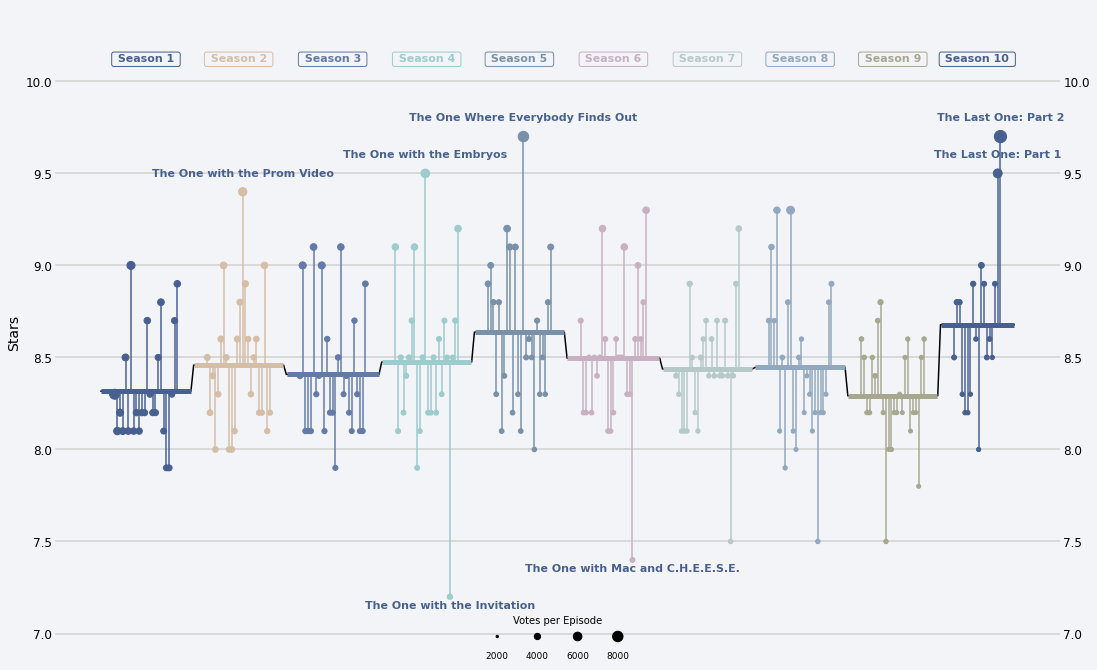

In [15]:
fig, ax = plt.subplots(figsize = (18,12))
fig.patch.set_facecolor("#F3F4F7")
ax.set_facecolor("#F3F4F7")

for h in HLINES:
    plt.axhline(h, color="#d1d1d1", zorder=0)

plt.vlines(x="episode_mod", ymin="Stars", ymax="avg", color=cmap_regular(normalize(df_friends_avg["Season"])), data = df_friends_avg)

plt.plot("x", "y", "-", color="#000000", data=df_lines)

for season in df_lines["Season"].unique():
    d = df_lines[df_lines["Season"] == season]
    plt.plot("x_group", "y", "", color=cmap_regular(normalize(season)), lw=5, data=d, solid_capstyle="butt")

plt.scatter("episode_mod", "Stars", s = scale_to_interval(df_friends_avg["Votes"]), color=cmap_regular(normalize(df_friends_avg["Season"])), data=df_friends_avg, zorder=3)

midpoints = df_friends_avg["mid"].unique()
for season, mid in enumerate(midpoints):
    color = cmap_regular(normalize(season + 1))
    plt.text(mid, 10.12, f" Season {season + 1} ", color=color, weight="bold", ha="center", va="center", fontsize=11, bbox=dict(facecolor="none", edgecolor=color, linewidth=1, boxstyle="round", pad=0.2))

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["left"].set_color("none")

plt.tick_params(axis="y", labelright=True, length=0)
plt.yticks(HLINES, fontsize=12)
plt.ylim(0.98 * 7, 10.2 * 1.02)
plt.xticks([], "")
plt.ylabel("Stars", fontsize = 14)

x_pos = [0.44, 0.48, 0.52, 0.56]
votes = [2000, 4000, 6000, 8000]

plt.scatter(x_pos, [0.035] * 4, s=scale_to_interval(np.array(votes)), color="black", transform=ax.transAxes)

plt.text(0.5, 0.055, "Votes per Episode", fontsize=10, ha="center", transform=ax.transAxes)

for (xpos, vote) in zip(x_pos, votes):
    plt.text(xpos, 0.0001,  f"{vote}", fontsize=9, ha="center", transform=ax.transAxes)

titles = df_friends_avg[['Episode_Title','episode_mod', 'Stars']][(df_friends_avg['Stars'] > 9.3)]
titles2 = df_friends_avg[['Episode_Title','episode_mod', 'Stars']][(df_friends_avg['Stars'] < 7.5)]

for i in titles.index:
    plt.text(titles['episode_mod'][i], titles['Stars'][i] + 0.1, f"{titles['Episode_Title'][i]}", color=color, weight="bold", ha="center", va="center", fontsize=11)

for i in titles2.index:
    plt.text(titles2['episode_mod'][i], titles2['Stars'][i] - 0.05, f"{titles2['Episode_Title'][i]}", color=color, weight="bold", ha="center", va="center", fontsize=11)
    

    
plt.savefig(
    "friends-plot.png", 
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.3
)